### Importing libraries

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


### Loading the dataset

In [4]:
data=pd.read_csv("student_scores.csv")
data.head()

,Hours_Studied,Attendance,Final_Score
0,7,61,81.5
1,4,88,75.0
2,8,51,89.5
3,5,52,63.0
4,7,98,100.0


### Chek data for missing values 


In [5]:
data.isnull().sum()

Hours_Studied    0
Attendance       0
Final_Score      0
dtype: int64

### Summary statistics

In [6]:
data.describe()

,Hours_Studied,Attendance,Final_Score
count,150.000000,150.000000,150.000000
mean,5.300000,74.566667,77.740000
std,2.633675,14.862419,19.658726
min,1.000000,50.000000,35.000000
25%,3.000000,61.500000,61.125000
50%,5.000000,75.000000,83.750000
75%,8.000000,85.750000,95.875000
max,9.000000,100.000000,100.000000


### Plotting  scatter plot to visualize the relationship between 'Hours','Scores' and 'Attendance'

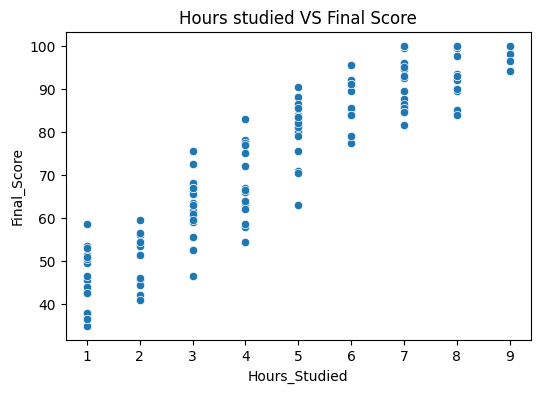

In [11]:
plt.figure(figsize=(6,4)) 
sns.scatterplot(x='Hours_Studied',y='Final_Score',data=data)
plt.title("Hours studied VS Final Score")
plt.show()

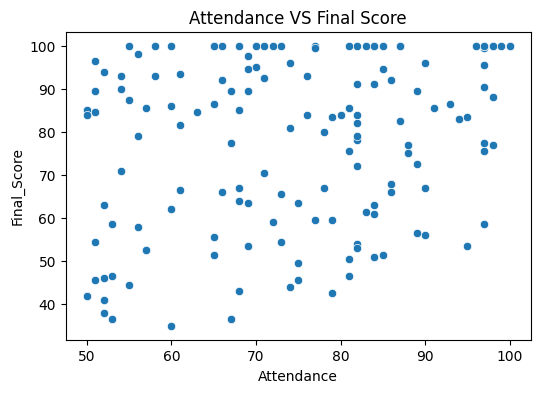

In [12]:
# Attendance VS Final Score 
plt.figure(figsize=(6,4)) 
sns.scatterplot(x='Attendance',y='Final_Score',data=data)
plt.title("Attendance VS Final Score")
plt.show()


In [13]:
# Check correlation between variables 
correlation=data['Hours_Studied'].corr(data['Final_Score'])
print(f"Correlation between Hours and Scores: {correlation}")

Correlation between Hours and Scores: 0.9360641911873165


In [14]:
# Cheking correlation between 'Attendance' and 'Final_Score'
correlation2=data["Attendance"].corr(data['Final_Score'])
print(f"Correlation between Hours and Scores: {correlation2}")

Correlation between Hours and Scores: 0.25786818886529045


**Since correlation between Attendance and Final Score is very low (~0.26) , I am going to do both simple regression(Hours_Studied → Final_Score) and multiple regression(Hours_Studied + Attendance → Final_Score)**

### Simple Linear Regression (Hours_Studied -> Final_Score)


In [27]:
X_simple = data[["Hours_Studied"]]
y = data["Final_Score"]


In [28]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


In [37]:
# Training the model
model_simple = LinearRegression()
hour = float(input("\n⏳ Enter Study Hours: "))
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)
print(f" Predicted Score if a student studies {hour} hours/day ={y_pred_simple[0]:.2f}%")



⏳ Enter Study Hours:  4


 Predicted Score if a student studies 4.0 hours/day =97.03%


In [40]:
print("🔹 Simple Regression (Hours_Studied only)")
print("R² Score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print(f"R2 Score: {r2_score(y_test, y_pred_simple):.2f}")


🔹 Simple Regression (Hours_Studied only)
R² Score: 0.8603420512732348
MAE: 5.4483598015922645
R2 Score: 0.86


### MULTIPLE LINEAR REGRESSION (Hours_Studied + Attendance → Final_Score)

In [41]:
X_multi = data[["Hours_Studied", "Attendance"]]
y = data["Final_Score"]


In [42]:
#Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)



In [43]:
# Training the model 
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)



In [45]:
#R2 Score and MAE 
print(f"R2 Score: {r2_score(y_test, y_pred_multi):.2f}")
print(f"Mean Absolute  Error: {mean_absolute_error(y_test, y_pred_multi):.2f}")


R2 Score: 0.94
Mean Absolute  Error: 3.22


In [46]:
# Result 
hour = float(input("\n⏳ Enter Study Hours: "))
attendance = float(input("📅 Enter Attendance (%): "))

pred_multi = multi_model.predict([[hour, attendance]])
print(f"👉 Predicted Score for {hour} study hours & {attendance}% attendance = {pred_multi[0]:.2f}%")


⏳ Enter Study Hours:  4
📅 Enter Attendance (%):  80


👉 Predicted Score for 4.0 study hours & 80.0% attendance = 70.80%


C:\Users\Aaditya Narayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
